## Intorduction

The purpose of this project is to analyze the historical data on game sales up to 2016 and to see if there are any insights that can be gained in order to predict what games will be successful in 2017.  

The project will be broken into 4 parts:
1. Imports - import the data and clean it up for analysis.
2. EDA - explore the data and see if any interesting trends emerge.
3. Hypothesis Testing - Test to see if there are significant differences in important populations.
4. Conclusion - Wrap up and analyses all of the work to summarize the insights from the data.  


## Imports


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [3]:
df_games = pd.read_csv('datasets/games.csv')
df_games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


#### Import Conclusions:

There are several null values in the ratings, user_score, and critic_scores.  These will need to be handled, but we need to preserve some way of telling what games did not have a score.  The best option is to provide a non-conflicting value like -1 since no user/critic score can be -1 it makes it clear that this game did not have a rating.  However, this will make aggregation analysis less accurate so we will keep the original data as is so we can make aggregations off of that.  

The column names are all capitalized so we need to make them lowercase.  The column types seem appropriate for the data they hold.  The only noticeable issue is the year of release which is a float, but since we are not looking at partial years it should be either an int or a datetime type.  However, there are some null values in the year column so we need to handle them first and an int would be the best option where the null values are replaced by a -1 so it is noticeable in the data.  This should not affect the data too much, but in the case we need to do data aggregation it will cause issues like above so we will ensure this is in a separate data set as well. 

#### Change Columns to Lowercase

In [5]:
df_games.columns = df_games.columns.str.lower()
df_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


#### Deal with Implicit Nulls

In [6]:
df_games['user_score'] = df_games['user_score'].replace('tbd',np.NaN)
df_games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

**Conclusion**

Here we are replacing the implicit null of "tbd" with a full null so we can handle it with fillna.  We are handling this because it is not particularly valuable to have them separate.  It is likely that this "tbd" is due to the game being new and not yet having enough user scores to aggregate.  

#### Create No Null Dataframe

In [7]:
df_games_no_null = df_games.copy()
df_games_no_null['year_of_release'] = df_games['year_of_release'].fillna(-1).astype('int')
df_games_no_null['critic_score'] = df_games['critic_score'].fillna(-1)
df_games_no_null['user_score'] = df_games['user_score'].fillna(-1)
df_games_no_null['rating'] = df_games['rating'].fillna('NA')

## Only 2 that are missing we will mark them with NA for now
df_games_no_null['genre'] = df_games['genre'].fillna('NA')
df_games_no_null['name'] = df_games['genre'].fillna('NA')

df_games_no_null.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int32  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  float64
 9   user_score       16715 non-null  object 
 10  rating           16715 non-null  object 
dtypes: float64(5), int32(1), object(5)
memory usage: 1.3+ MB


In [8]:
df_games_no_null.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Platform,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1,NA
2,Racing,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Sports,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Role-Playing,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1,NA


#### Null Replace Conclusions

Now we have a dataframe that has an actual value for each column for each row while also preserving the ability to aggregate accurate averages.  It is important to note that there are several reasons why a game does not have ratings or scores, for example, older games may not have been active in the market when advisory ranks or user scoring was widely used.  Conversely, it is possible that the game is too new for all of the ratings to be in.  

## Exploritory Data Analysis

### Goals
1. Games released by year
2. Sales by Platform
3. 2017 Predictions
4. Effect of Revews on Sales
5. Trends in profitable games

#### Games Released by Year

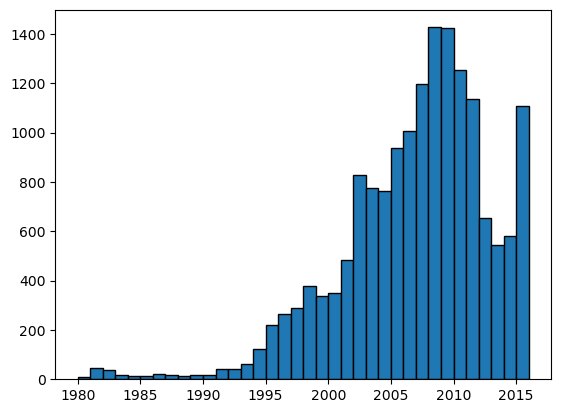

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,NaN,E
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
...,...,...,...,...,...,...,...,...,...,...,...
11000,Demon Chaos,PS2,NaN,Action,0.00,0.00,0.09,0.00,NaN,NaN,NaN
10837,Egg Monster Hero,DS,NaN,Role-Playing,0.00,0.00,0.09,0.00,NaN,NaN,E
15022,Umineko no Naku Koro ni San: Shinjitsu to Gens...,PS3,NaN,Adventure,0.00,0.00,0.02,0.00,NaN,NaN,NaN
10764,Luminous Arc 2 (JP sales),DS,NaN,Role-Playing,0.00,0.00,0.10,0.00,NaN,NaN,NaN


In [9]:
df_games['year_of_release'].hist(bins=36,edgecolor='black',grid=False)

plt.show()

df_games[df_games['year_of_release'].isnull()].sort_values(by='na_sales',ascending=False)

**Conclusion**

The data for the release year shows a clear trend toward increasing video game production over time until about 2012 when the rate of game production dropped off a bit.  The reason for this drop is unclear, but it could be due simply to platform release timing.  It is also relevant that there are 269 titles that do not have a reported year_of_release.  The reason for this is unclear, but there does not seem to be clear data in this dataset to speculate on why.  

 

#### Sales By Platform

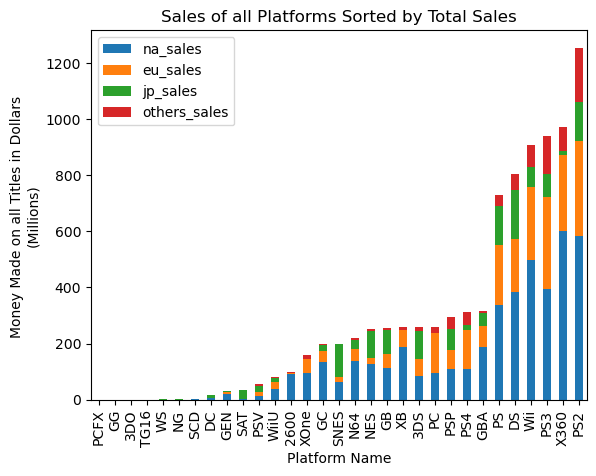

In [10]:
srs_platform_na_total = df_games.groupby(by='platform')['na_sales'].agg('sum')
srs_platform_eu_total = df_games.groupby(by='platform')['eu_sales'].agg('sum')
srs_platform_jp_total = df_games.groupby(by='platform')['jp_sales'].agg('sum')
srs_platform_other_total = df_games.groupby(by='platform')['other_sales'].agg('sum')

lst_platforms = list(df_games['platform'].unique())

lst_platform_sales = []

for key in lst_platforms:
    na = srs_platform_na_total[key]
    eu = srs_platform_eu_total[key]
    jp = srs_platform_jp_total[key]
    other = srs_platform_other_total[key]
    sum = na+eu+jp+other
    lst_platform_sales.append([key,na,eu,jp,other,sum])
    
df_games_platform_sales = pd.DataFrame(lst_platform_sales,columns=['platform','na_sales','eu_sales','jp_sales','others_sales','total_sales'])
df_games_platform_sales = df_games_platform_sales.sort_values(by='total_sales')

df_games_platform_sales.plot(kind='bar',x='platform',y=['na_sales','eu_sales','jp_sales','others_sales'],stacked=True)
plt.title('Sales of all Platforms Sorted by Total Sales')
plt.xlabel('Platform Name')
plt.ylabel('Money Made on all Titles in Dollars \n(Millions)')
plt.show()

**Conclusion**

There are clear success and failures in the platforms looking at total sales.  This may simply be due to the volume of titles developed for any given platform or the servicable lifespan of the platform.  It would be ideal to look at the span of title releasese for PS, DS, Wii, PS3, X360, and PS2 since they have the clear higest sales.  

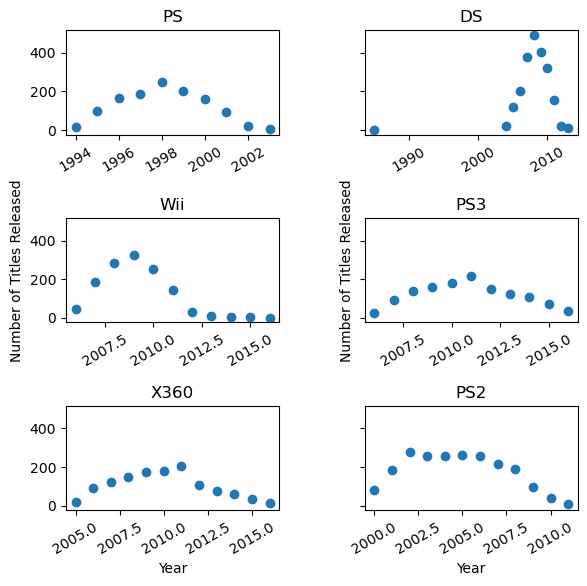

In [11]:
srs_platform_title_distribution = df_games.groupby(by = 'platform')['year_of_release'].value_counts()

lst_platforms = ['PS','DS','Wii','PS3','X360','PS2']
lst_years = list(df_games['year_of_release'].unique())

lst_platform_title_year_releases = []

for key in lst_platforms:
    for year in lst_years:
        if year in srs_platform_title_distribution[key]:
            titles_per_year = srs_platform_title_distribution[key][year]
            lst_platform_title_year_releases.append([key,year,titles_per_year])

df_titles_per_year = pd.DataFrame(lst_platform_title_year_releases,columns=['platform','year','num_titles'])

fig,axs= plt.subplots( 3, 2,sharey=True)
plt.subplots_adjust(left=0.1,
                    bottom=1, 
                    right=0.9, 
                    top=2, 
                    wspace=0.4, 
                    hspace=0.8)


axs[0,0].scatter(data=df_titles_per_year[df_titles_per_year['platform']=='PS'],x='year',y='num_titles')
axs[0,0].set_title('PS')
axs[0,0].tick_params(axis='x',rotation=30)
axs[0,1].scatter(data=df_titles_per_year[df_titles_per_year['platform']=='DS'],x='year',y='num_titles')
axs[0,1].set_title('DS')
axs[0,1].tick_params(axis='x',rotation=30)
axs[1,0].scatter(data=df_titles_per_year[df_titles_per_year['platform']=='Wii'],x='year',y='num_titles')
axs[1,0].set_title('Wii')
axs[1,0].tick_params(axis='x',rotation=30)
axs[1,0].set_ylabel('Number of Titles Released')
axs[1,1].scatter(data=df_titles_per_year[df_titles_per_year['platform']=='PS3'],x='year',y='num_titles')
axs[1,1].set_title('PS3')
axs[1,1].tick_params(axis='x',rotation=30)
axs[1,1].set_ylabel('Number of Titles Released')
axs[2,0].scatter(data=df_titles_per_year[df_titles_per_year['platform']=='X360'],x='year',y='num_titles')
axs[2,0].set_title('X360')
axs[2,0].set_xlabel('Year')
axs[2,0].tick_params(axis='x',rotation=30)
axs[2,1].scatter(data=df_titles_per_year[df_titles_per_year['platform']=='PS2'],x='year',y='num_titles')
axs[2,1].set_title('PS2')
axs[2,1].set_xlabel('Year')
axs[2,1].tick_params(axis='x',rotation=30)

plt.show()

**Conclusion**

It seems that for the most popular platforms, the number of titles released is slow at first then picks up in the middle of the life cycle, then falls off toward the end of the cycle.  This makes sense when the development cycle of each game is taken into account, a new title started after the platform has launched takes a few years to be released.  The next question is what the average lifespan of a platform is.

In [12]:
srs_platform_span_min = df_games.groupby(by= 'platform')['year_of_release'].min()
srs_platform_span_max = df_games.groupby(by= 'platform')['year_of_release'].max()

lst_platforms = list(df_games['platform'].unique())

lst_platform_span = []

for key in lst_platforms:
    max = srs_platform_span_max[key]
    min = srs_platform_span_min[key]
    sum = max-min
    lst_platform_span.append([key,max,min,sum])

df_platform_span = pd.DataFrame(lst_platform_span,columns=['platform','max','min','span'])
df_platform_span.describe()

,max,min,span
count,31.000000,31.000000,31.000000
mean,2005.258065,1997.645161,7.612903
std,9.273503,9.094131,6.998464
min,1989.000000,1980.000000,0.000000
25%,1996.000000,1992.500000,3.000000
50%,2007.000000,1996.000000,6.000000
75%,2016.000000,2004.500000,10.000000
max,2016.000000,2013.000000,31.000000


**Conclusion**

The average life span of a platform is 7.6 years, and the median is 6 years.  This suggests that if there were new platforms released recently, then about 3 years after the release of the platform the highest number of titles will be released for that platform (assuming they follow the trend of the most successful platforms).  This helps predict the next year's sales by allowing better assumptions on the number of titles released based on where in the life cycle the new platforms are.

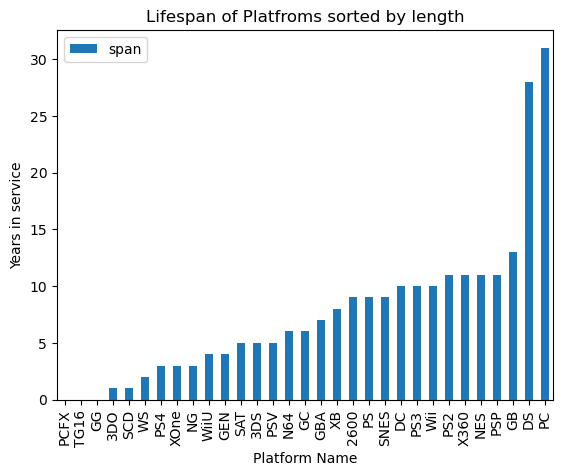

,platform,max,min,span
3,DS,2013.0,1985.0,28.0
14,PC,2016.0,1985.0,31.0


In [13]:
df_platform_span = df_platform_span.sort_values(by='span')

df_platform_span.plot(kind='bar',x='platform',y='span')
plt.title('Lifespan of Platfroms sorted by length')
plt.xlabel('Platform Name')
plt.ylabel('Years in service')
plt.show()

df_platform_span[df_platform_span['platform'].isin(['DS','PC'])]

**Conclusion**

This data suggests that the outliers have had a very long history of games released, but it seems only the PC has games currently in production.  The DS's long history is likely due to older titles being re-released for the new platform but the "year of production" not being updated to represent the re-release since the DS was not created in 1985.  

For the purposes of our analysis, we only need to consider the platforms that are currently producing new titles.  We will sort the data to represent that next.  

#### Find Current Data

In [14]:
srs_current_platforms = df_platform_span[df_platform_span['max']==2016.0]

df_current_platforms = df_games[df_games['platform'].isin(srs_current_platforms['platform'])]
df_current_platforms['platform'].unique()

array(['Wii', 'X360', 'PS3', 'PS4', '3DS', 'PC', 'XOne', 'WiiU', 'PSV'],
      dtype=object)

**Conclusion**

We now have the 9 current platforms.  We now need to adjust the year span of these platforms to represent the current market.  Looking above after 2009 there was a dropoff in the number of titles released per year so it would be reasonable to assume there was a shift in the market.  We can use the 20010 and after data to represent the current market.

In [15]:
df_current_market = df_current_platforms[df_current_platforms['year_of_release']>2009]
df_current_market.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,2178.000000
mean,2012.755503,0.250599,0.190270,0.055441,0.059986,70.602847
std,2.033947,0.670574,0.508655,0.214520,0.165663,13.647970
min,2010.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2011.000000,0.000000,0.000000,0.000000,0.000000,62.000000
50%,2013.000000,0.060000,0.040000,0.000000,0.010000,73.000000
75%,2015.000000,0.220000,0.160000,0.040000,0.050000,81.000000
max,2016.000000,15.000000,9.090000,4.390000,3.960000,97.000000


**Conclusion**

Now the minimum year of release is 2010 and the only consolse are the ones in current production.  We can use this information to do analysis on the current market.

#### Trends in Current Market

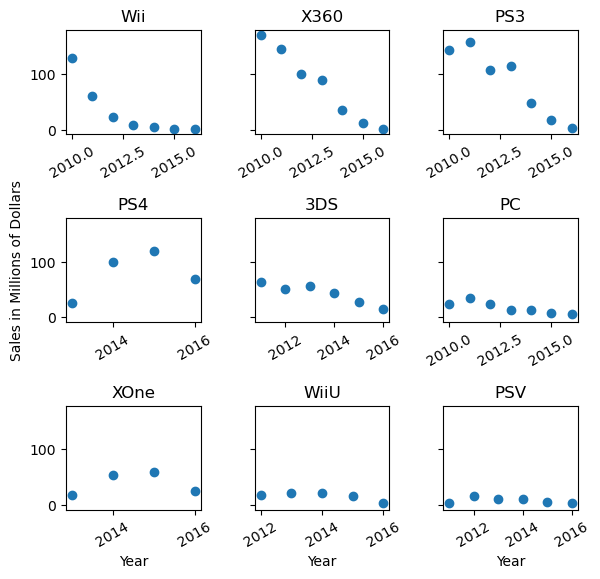

In [16]:
srs_platform_na_total_by_year = df_current_market.groupby(by=['platform','year_of_release'])['na_sales'].agg('sum')
srs_platform_eu_total_by_year = df_current_market.groupby(by=['platform','year_of_release'])['eu_sales'].agg('sum')
srs_platform_jp_total_by_year = df_current_market.groupby(by=['platform','year_of_release'])['jp_sales'].agg('sum')
srs_platform_other_total_by_year = df_current_market.groupby(by=['platform','year_of_release'])['other_sales'].agg('sum')

lst_platforms = list(df_current_market['platform'].unique())
lst_years = list(df_current_market['year_of_release'].unique())

lst_current_market_performance = []
for key in lst_platforms:
    for year in lst_years:
        if year in srs_platform_na_total_by_year[key]:
            na = srs_platform_na_total_by_year[key][year]
            eu = srs_platform_eu_total_by_year[key][year]
            jp = srs_platform_jp_total_by_year[key][year]
            other = srs_platform_other_total_by_year[key][year]
            sum = na+eu+jp+other
            lst_current_market_performance.append([key,year,na,eu,jp,other,sum])
            
df_current_market_performance = pd.DataFrame(lst_current_market_performance,columns=['platform','year','na_sales','eu_sales','jp_sales','other_sales','total_sales'])

fig,axs= plt.subplots( 3, 3,sharey=True)
plt.subplots_adjust(left=0.1,
                    bottom=1, 
                    right=0.9, 
                    top=2, 
                    wspace=0.4, 
                    hspace=0.8)


axs[0,0].scatter(data=df_current_market_performance[df_current_market_performance['platform']=='Wii'],x='year',y='total_sales')
axs[0,0].set_title('Wii')
axs[0,0].tick_params(axis='x',rotation=30)
axs[0,1].scatter(data=df_current_market_performance[df_current_market_performance['platform']=='X360'],x='year',y='total_sales')
axs[0,1].set_title('X360')
axs[0,1].tick_params(axis='x',rotation=30)
axs[0,2].scatter(data=df_current_market_performance[df_current_market_performance['platform']=='PS3'],x='year',y='total_sales')
axs[0,2].set_title('PS3')
axs[0,2].tick_params(axis='x',rotation=30)
axs[1,0].scatter(data=df_current_market_performance[df_current_market_performance['platform']=='PS4'],x='year',y='total_sales')
axs[1,0].set_title('PS4')
axs[1,0].tick_params(axis='x',rotation=30)
axs[1,0].set_ylabel('Sales in Millions of Dollars')
axs[1,1].scatter(data=df_current_market_performance[df_current_market_performance['platform']=='3DS'],x='year',y='total_sales')
axs[1,1].set_title('3DS')
axs[1,1].tick_params(axis='x',rotation=30)
axs[1,2].scatter(data=df_current_market_performance[df_current_market_performance['platform']=='PC'],x='year',y='total_sales')
axs[1,2].set_title('PC')
axs[1,2].tick_params(axis='x',rotation=30)
axs[2,0].scatter(data=df_current_market_performance[df_current_market_performance['platform']=='XOne'],x='year',y='total_sales')
axs[2,0].set_title('XOne')
axs[2,0].set_xlabel('Year')
axs[2,0].tick_params(axis='x',rotation=30)
axs[2,1].scatter(data=df_current_market_performance[df_current_market_performance['platform']=='WiiU'],x='year',y='total_sales')
axs[2,1].set_title('WiiU')
axs[2,1].set_xlabel('Year')
axs[2,1].tick_params(axis='x',rotation=30)
axs[2,2].scatter(data=df_current_market_performance[df_current_market_performance['platform']=='PSV'],x='year',y='total_sales')
axs[2,2].set_title('PSV')
axs[2,2].set_xlabel('Year')
axs[2,2].tick_params(axis='x',rotation=30)

plt.show()

**Conclusion**

It seems that all current platforms are experiencing a dropoff in sales.  The largest dropoffs are in the Wii, X360, and PS3 which makes sense since those are the previous generation of platforms, however, the new consoles are also showing a bit of a dropoff.  The steadiest platforms have been the PSV, WiiU, and PC.  

The question of profitable platforms depends much on the development costs of titles for a given platform, but the best bets right now would appear to be the PS4, XOne, PC, WiiU, and PSV.  

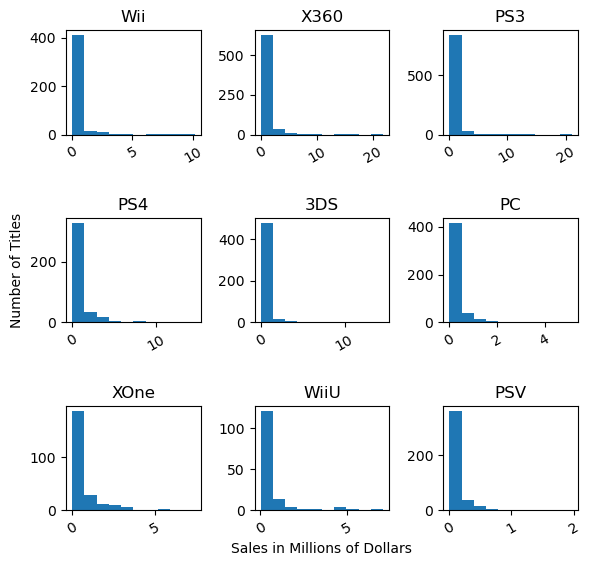

In [17]:
lst_na_sales = df_current_market[['name','platform','year_of_release','na_sales']].values.tolist()
lst_eu_sales = df_current_market[['name','platform','year_of_release','eu_sales']].values.tolist()
lst_jp_sales = df_current_market[['name','platform','year_of_release','jp_sales']].values.tolist()
lst_other_sales = df_current_market[['name','platform','year_of_release','other_sales']].values.tolist()

lst_total_sales = []
itter = 0

for row in lst_na_sales:
    sum = row[3]+lst_eu_sales[itter][3]+lst_jp_sales[itter][3]+lst_other_sales[itter][3]
    itter += 1
    lst_total_sales.append([row[0],row[1],row[2],sum])

df_total_sales = pd.DataFrame(lst_total_sales,columns=['name','platform','year','total_sales'])

df_current_market_totals = pd.merge(df_current_market,df_total_sales,left_on=['name','platform','year_of_release'],right_on=['name','platform','year'])

fig,axs= plt.subplots( 3, 3)
plt.subplots_adjust(left=0.1,
                    bottom=1, 
                    right=0.9, 
                    top=2, 
                    wspace=0.4, 
                    hspace=0.8)


axs[0,0].hist(data=df_current_market_totals[df_current_market_totals['platform']=='Wii' ],x='total_sales')
axs[0,0].set_title('Wii')
axs[0,0].tick_params(axis='x',rotation=30)
axs[0,1].hist(data=df_current_market_totals[df_current_market_totals['platform']=='X360'],x='total_sales')
axs[0,1].set_title('X360')
axs[0,1].tick_params(axis='x',rotation=30)
axs[0,2].hist(data=df_current_market_totals[df_current_market_totals['platform']=='PS3'],x='total_sales')
axs[0,2].set_title('PS3')
axs[0,2].tick_params(axis='x',rotation=30)
axs[1,0].hist(data=df_current_market_totals[df_current_market_totals['platform']=='PS4'],x='total_sales')
axs[1,0].set_title('PS4')
axs[1,0].tick_params(axis='x',rotation=30)
axs[1,0].set_ylabel('Number of Titles')
axs[1,1].hist(data=df_current_market_totals[df_current_market_totals['platform']=='3DS'],x='total_sales')
axs[1,1].set_title('3DS')
axs[1,1].tick_params(axis='x',rotation=30)
axs[1,2].hist(data=df_current_market_totals[df_current_market_totals['platform']=='PC'],x='total_sales')
axs[1,2].set_title('PC')
axs[1,2].tick_params(axis='x',rotation=30)
axs[2,0].hist(data=df_current_market_totals[df_current_market_totals['platform']=='XOne'],x='total_sales')
axs[2,0].set_title('XOne')
axs[2,0].tick_params(axis='x',rotation=30)
axs[2,1].hist(data=df_current_market_totals[df_current_market_totals['platform']=='WiiU'],x='total_sales')
axs[2,1].set_title('WiiU')
axs[2,1].set_xlabel('Sales in Millions of Dollars')
axs[2,1].tick_params(axis='x',rotation=30)
axs[2,2].hist(data=df_current_market_totals[df_current_market_totals['platform']=='PSV'],x='total_sales')
axs[2,2].set_title('PSV')
axs[2,2].tick_params(axis='x',rotation=30)

**Conclusions**

As expected most titles don't make much money, however looking at the data there are some platforms that seem to be more successful than others.  Wii, X360, and PS3 have some very big titles but they also have a large number of titles as well.  However, the more recent platforms like the XOne, PS4, and WiiU all have some really big successes even with many fewer titles.  This suggests the market is looking for new titles on these consoles first.  

#### Ratings effect on Total Sales

array(['6.3', '8.2', '8.1', '3.4', nan, '5.3', '4.8', '3.2', '6.4', '8.3',
       '8.4', '7.5', '2.6', '7.8', '7.2', '7.9', '7', '7.3', '8.7', '4.3',
       '7.4', '6.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '8.6', '9',
       '6.1', '6.7', '5.4', '4', '8', '8.5', '4.9', '4.5', '6.2', '4.2',
       '7.7', '9.2', '7.6', '3.7', '4.1', '5.8', '5.6', '6.8', '5.5',
       '4.4', '5.9', '8.9', '3.9', '3.1', '2.9', '7.1', '6', '4.7', '5.1',
       '3.5', '2.5', '3', '2.7', '2.2', '5.2', '2.1', '3.3', '1.8', '3.8',
       '4.6', '9.3', '1.6', '3.6', '2.4', '2.8', '1.7', '2', '1.5', '0.7',
       '0.5', '0.2', '1.2', '1.9', '1.3', '1', '1.4', '2.3'], dtype=object)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year,total_sales
0,Kinect Adventures!,X360,2010.0,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,2010.0,21.82
1,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,2013.0,21.05
2,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,2013.0,16.27
3,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,2011.0,14.73
4,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,NaN,2015.0,14.63


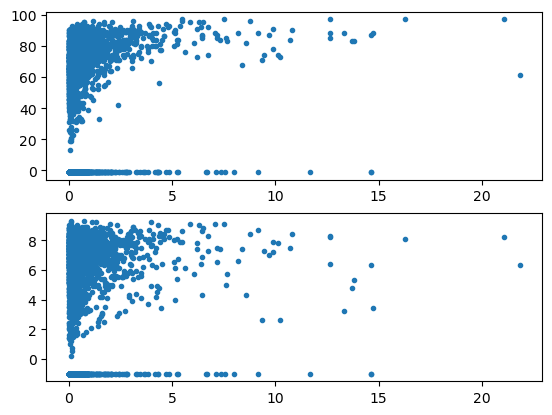

In [18]:
df_current_market_totals_no_null = df_current_market_totals.copy()

display(df_current_market_totals_no_null['user_score'].unique())

df_current_market_totals_no_null['critic_score'] = df_current_market_totals_no_null['critic_score'].fillna(-1)
df_current_market_totals_no_null['user_score'] = df_current_market_totals_no_null['user_score'].fillna(-1).astype('float')

display(df_current_market_totals_no_null.head())

fig,axs= plt.subplots(2,1)

axs[0].scatter(data=df_current_market_totals_no_null,x='total_sales',y='critic_score',marker=".")

axs[1].scatter(data=df_current_market_totals_no_null,x='total_sales',y='user_score',marker=".")
plt.show()

**Conclusion**

It seems that the critic score is much more corrilated with the total sales of the game than the user score.  It is also worth noting that this is not a linear relationship, but rather a logirimithc one. Also note all fo the values below 0 are games missing scores.

#### Sales by Genre

In [19]:
df_current_market_totals['genre'].unique()

array(['Misc', 'Action', 'Shooter', 'Role-Playing', 'Racing', 'Platform',
       'Simulation', 'Sports', 'Fighting', 'Strategy', 'Adventure',
       'Puzzle'], dtype=object)

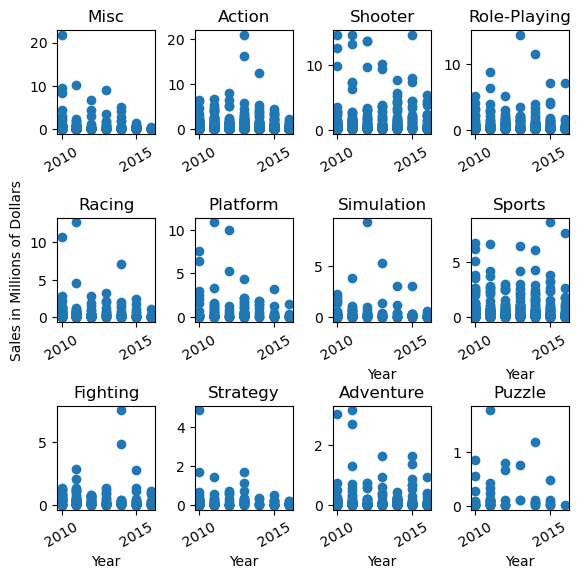

In [20]:
fig,axs= plt.subplots( 3, 4)
plt.subplots_adjust(left=0.1,
                    bottom=1, 
                    right=0.9, 
                    top=2, 
                    wspace=0.4, 
                    hspace=0.8)


axs[0,0].scatter(data=df_current_market_totals[df_current_market_totals['genre']=='Misc'],x='year',y='total_sales')
axs[0,0].set_title('Misc')
axs[0,0].tick_params(axis='x',rotation=30)
axs[0,1].scatter(data=df_current_market_totals[df_current_market_totals['genre']=='Action'],x='year',y='total_sales')
axs[0,1].set_title('Action')
axs[0,1].tick_params(axis='x',rotation=30)
axs[0,2].scatter(data=df_current_market_totals[df_current_market_totals['genre']=='Shooter'],x='year',y='total_sales')
axs[0,2].set_title('Shooter')
axs[0,2].tick_params(axis='x',rotation=30)
axs[0,3].scatter(data=df_current_market_totals[df_current_market_totals['genre']=='Role-Playing'],x='year',y='total_sales')
axs[0,3].set_title('Role-Playing')
axs[0,3].tick_params(axis='x',rotation=30)
axs[1,0].scatter(data=df_current_market_totals[df_current_market_totals['genre']=='Racing'],x='year',y='total_sales')
axs[1,0].set_title('Racing')
axs[1,0].tick_params(axis='x',rotation=30)
axs[1,0].set_ylabel('Sales in Millions of Dollars')
axs[1,1].scatter(data=df_current_market_totals[df_current_market_totals['genre']=='Platform'],x='year',y='total_sales')
axs[1,1].set_title('Platform')
axs[1,1].tick_params(axis='x',rotation=30)
axs[1,2].scatter(data=df_current_market_totals[df_current_market_totals['genre']=='Simulation'],x='year',y='total_sales')
axs[1,2].set_title('Simulation')
axs[1,2].set_xlabel('Year')
axs[1,2].tick_params(axis='x',rotation=30)
axs[1,3].scatter(data=df_current_market_totals[df_current_market_totals['genre']=='Sports'],x='year',y='total_sales')
axs[1,3].set_title('Sports')
axs[1,3].set_xlabel('Year')
axs[1,3].tick_params(axis='x',rotation=30)
axs[2,0].scatter(data=df_current_market_totals[df_current_market_totals['genre']=='Fighting'],x='year',y='total_sales')
axs[2,0].set_title('Fighting')
axs[2,0].set_xlabel('Year')
axs[2,0].tick_params(axis='x',rotation=30)
axs[2,1].scatter(data=df_current_market_totals[df_current_market_totals['genre']=='Strategy'],x='year',y='total_sales')
axs[2,1].set_title('Strategy')
axs[2,1].set_xlabel('Year')
axs[2,1].tick_params(axis='x',rotation=30)
axs[2,2].scatter(data=df_current_market_totals[df_current_market_totals['genre']=='Adventure'],x='year',y='total_sales')
axs[2,2].set_title('Adventure')
axs[2,2].set_xlabel('Year')
axs[2,2].tick_params(axis='x',rotation=30)
axs[2,3].scatter(data=df_current_market_totals[df_current_market_totals['genre']=='Puzzle'],x='year',y='total_sales')
axs[2,3].set_title('Puzzle')
axs[2,3].set_xlabel('Year')
axs[2,3].tick_params(axis='x',rotation=30)

plt.show()

**Conclusion**

It seems that there are clearly popular genres of games and unpopular ones.  However, of the genres in this data, the top performers are shooter and role-playing games.  In recent years, platform, racing, and action games have been losing popularity, but sports have been gaining and shooters have been steady.  

The unpopular titles seem to have a few breakout hits but mostly are simply low performers.  

### Data by Region

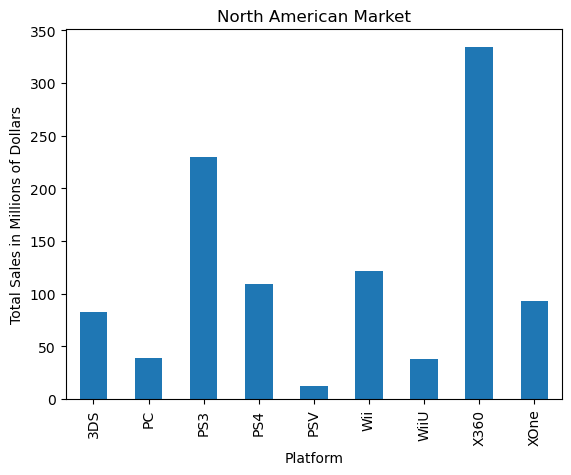

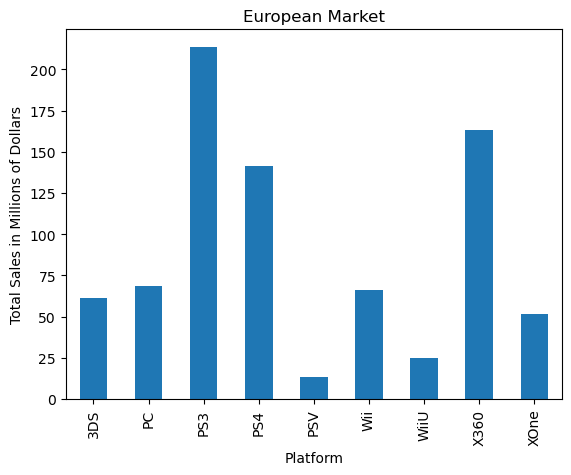

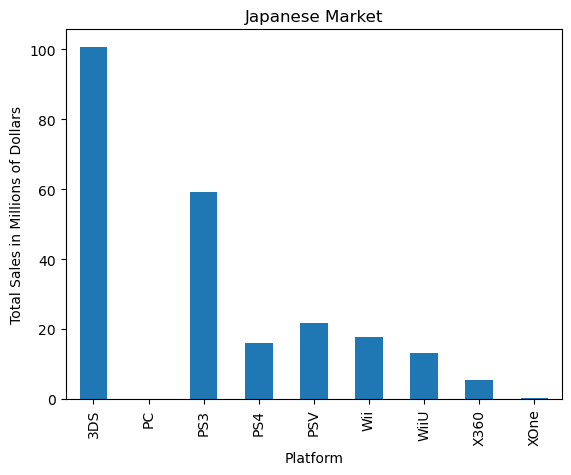

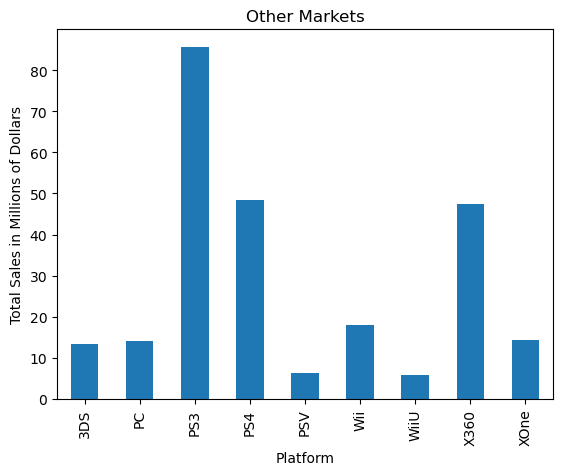

In [21]:
df_current_market_na = df_current_market[['name','platform','year_of_release','na_sales']]
df_current_market_eu = df_current_market[['name','platform','year_of_release','eu_sales']]
df_current_market_jp = df_current_market[['name','platform','year_of_release','jp_sales']]
df_current_market_other = df_current_market[['name','platform','year_of_release','other_sales']]

df_current_market_na.groupby(by='platform')['na_sales'].agg('sum').plot(kind='bar')
plt.xlabel('Platform')
plt.ylabel('Total Sales in Millions of Dollars')
plt.title('North American Market')
plt.show()

df_current_market_eu.groupby(by='platform')['eu_sales'].agg('sum').plot(kind='bar')
plt.xlabel('Platform')
plt.ylabel('Total Sales in Millions of Dollars')
plt.title('European Market')
plt.show()

df_current_market_jp.groupby(by='platform')['jp_sales'].agg('sum').plot(kind='bar')
plt.xlabel('Platform')
plt.ylabel('Total Sales in Millions of Dollars')
plt.title('Japanese Market')
plt.show()

df_current_market_other.groupby(by='platform')['other_sales'].agg('sum').plot(kind='bar')
plt.xlabel('Platform')
plt.ylabel('Total Sales in Millions of Dollars')
plt.title('Other Markets')
plt.show()



**Conclusion**

Each market has very different dominant platforms.  This is likely due to both cultural and marketing differences between the markets.  However, it is worth looking at the ESRB and Genre categories to see if any other trends exist.

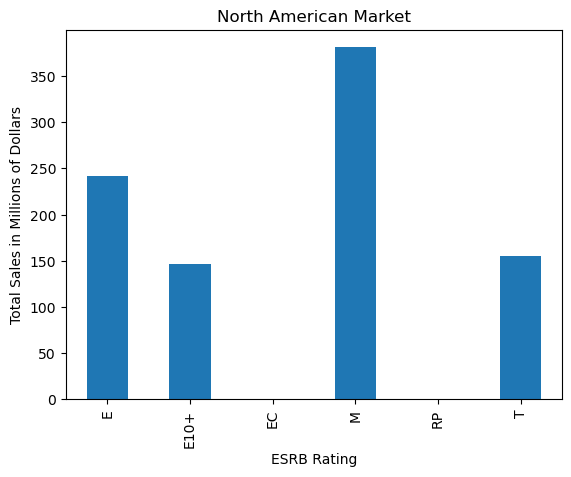

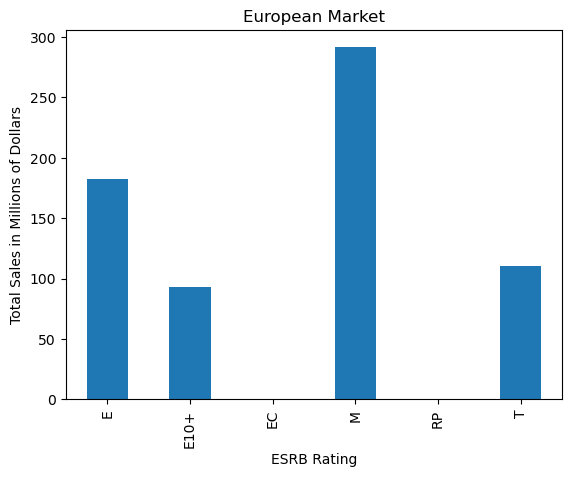

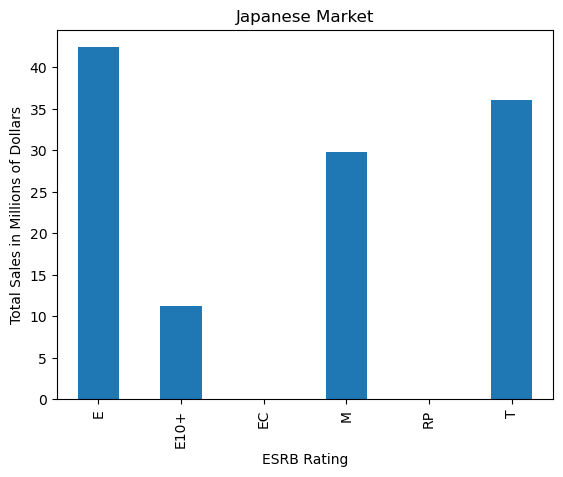

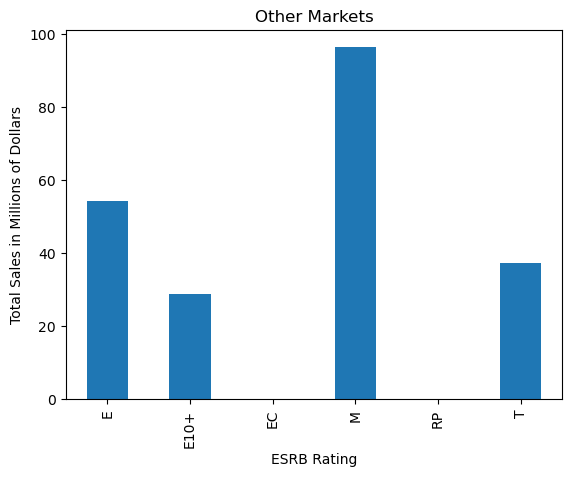

In [22]:
df_current_market_na = df_current_market[['name','platform','year_of_release','na_sales','rating','genre']]
df_current_market_eu = df_current_market[['name','platform','year_of_release','eu_sales','rating','genre']]
df_current_market_jp = df_current_market[['name','platform','year_of_release','jp_sales','rating','genre']]
df_current_market_other = df_current_market[['name','platform','year_of_release','other_sales','rating','genre']]

df_current_market_na.groupby(by='rating')['na_sales'].agg('sum').plot(kind='bar')
plt.xlabel('ESRB Rating')
plt.ylabel('Total Sales in Millions of Dollars')
plt.title('North American Market')
plt.show()

df_current_market_eu.groupby(by='rating')['eu_sales'].agg('sum').plot(kind='bar')
plt.xlabel('ESRB Rating')
plt.ylabel('Total Sales in Millions of Dollars')
plt.title('European Market')
plt.show()

df_current_market_jp.groupby(by='rating')['jp_sales'].agg('sum').plot(kind='bar')
plt.xlabel('ESRB Rating')
plt.ylabel('Total Sales in Millions of Dollars')
plt.title('Japanese Market')
plt.show()

df_current_market_other.groupby(by='rating')['other_sales'].agg('sum').plot(kind='bar')
plt.xlabel('ESRB Rating')
plt.ylabel('Total Sales in Millions of Dollars')
plt.title('Other Markets')
plt.show()


**Conclusion** 

It seems like rating does not have much difference between regions with the exception of Japan.  In Japan's market rated M games seem to underperform.  

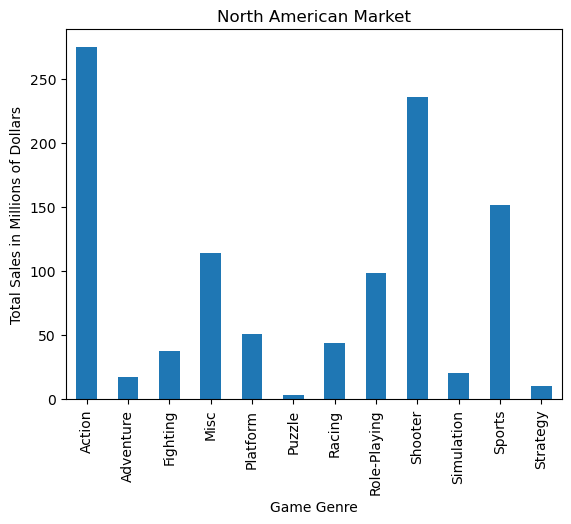

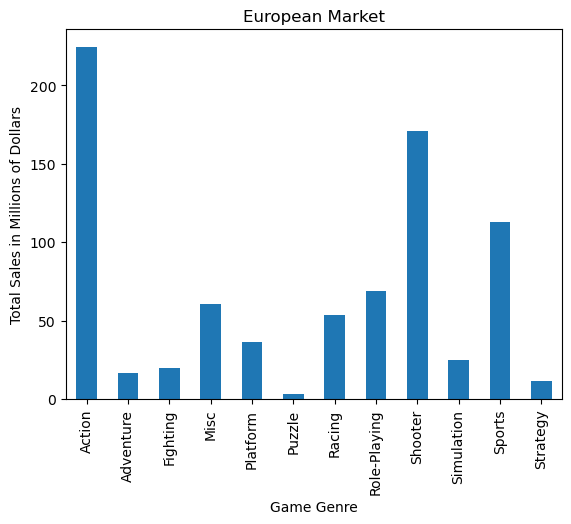

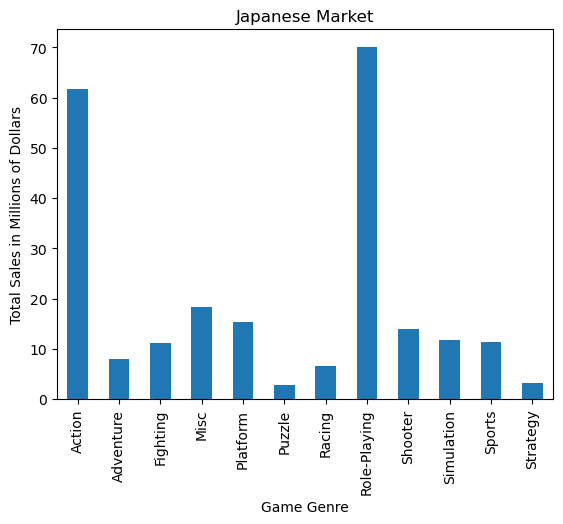

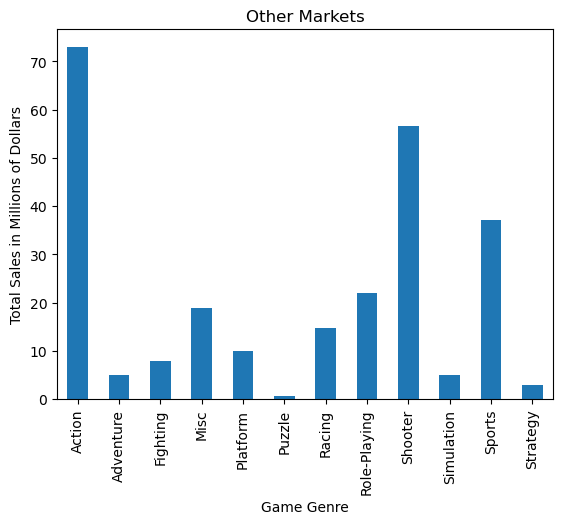

In [24]:
df_current_market_na.groupby(by='genre')['na_sales'].agg('sum').plot(kind='bar')
plt.xlabel('Game Genre')
plt.ylabel('Total Sales in Millions of Dollars')
plt.title('North American Market')
plt.show()

df_current_market_eu.groupby(by='genre')['eu_sales'].agg('sum').plot(kind='bar')
plt.xlabel('Game Genre')
plt.ylabel('Total Sales in Millions of Dollars')
plt.title('European Market')
plt.show()

df_current_market_jp.groupby(by='genre')['jp_sales'].agg('sum').plot(kind='bar')
plt.xlabel('Game Genre')
plt.ylabel('Total Sales in Millions of Dollars')
plt.title('Japanese Market')
plt.show()

df_current_market_other.groupby(by='genre')['other_sales'].agg('sum').plot(kind='bar')
plt.xlabel('Game Genre')
plt.ylabel('Total Sales in Millions of Dollars')
plt.title('Other Markets')
plt.show()

**Conclusion**

Once again it seems the only market that deviates from the average is the market in Japan.  In Japan Action and Role-playing games are very popular and shooters dramatically underperform compared to the rest of the markets.  

## Hypothsis Testing

#### Hypothesis 1: Average User Rating of XOne and PC

We want to test to see if the average user rating between these two platforms are the same or not.  Since the user rating is correlated with game performance this would suggest that users on different platforms are rating games with a similar statistical distribution.  If this idea can be supported it would suggest that increasing the volume of games on different platforms should provide proportional increases in successful titles.  

Null hypothesis: The user ratings on Xone and PC are the same

Hypothesis: The user ratings on Xone and PC are different

To perform this we will use a T-test and an alpha value of 0.025

We are using 2.5% as our alpha because if we are going to be using this data for inferring market performance we want to have a relatively high confidence in the analysis.  

In [45]:
xone_data = df_current_market[df_current_market['platform']=='XOne']['user_score'].astype('float')
pc_data = df_current_market[df_current_market['platform']=='PC']['user_score'].astype('float')


# We need to fill in the NaN values to perform our statistical analysis so we use the average value.
xone_data = xone_data.fillna(xone_data.mean())
pc_data = pc_data.fillna(pc_data.mean())

alpha=0.025

ttest_xone_pc_uratings = st.ttest_ind(xone_data,pc_data,equal_var=False)

print('Pvaule:',ttest_xone_pc_uratings.pvalue)

if(ttest_xone_pc_uratings.pvalue < alpha):
    print('We reject the null hypothesis')
else:
    print('We can\'t reject the null hypothesis')

Pvaule: 0.9736762884836382
We can't reject the null hypothesis


**Conclusion**

There is a 97% chance of randomly any given review from xone and pc being form the same population.  This is far too high to conclude they are significantly different.  Therefore we must conclude that the user ratings on Xone and PC are the same.  

#### Hypothesis 2: Average User Ratings for Action and Sports

We want to test if the user ratings are the same across genres as well.  Both sports and action games are popular in the North American market, yet they reasonably attract different populations of users.  If the populations have the same distribution of user scores then it will suggest that all videogame users are scoring games with a similar distribution and we may be able to use insights about that to find how many games need to be made to find one big success in any given genre.  

Null Hypothesis: The average user ratings for Action and Sports genre are the same.

Hypothesis: The average user ratings for Action and Sports genres are different.

To perform this we will use a T-test and an alpha value of 0.025

We are using 2.5% as our alpha because if we are going to be using this data for inferring market performance we want to have a relatively high confidence in the analysis.  

In [46]:
action_data = df_current_market[df_current_market['genre']=='Action']['user_score'].astype('float')
sports_data = df_current_market[df_current_market['genre']=='Sports']['user_score'].astype('float')


# We need to fill in the NaN values to perform our statistical analysis so we use the average value.
action_data = action_data.fillna(action_data.mean())
sports_data = sports_data.fillna(sports_data.mean())

alpha=0.025

ttest_action_sports_uratings = st.ttest_ind(action_data,sports_data,equal_var=False)

print('Pvaule:',ttest_action_sports_uratings.pvalue)

if(ttest_action_sports_uratings.pvalue < alpha):
    print('We reject the null hypothesis')
else:
    print('We can\'t reject the null hypothesis')

Pvaule: 7.225517254687966e-38
We reject the null hypothesis


**Conclusion**

It seems we can reject the null hypothesis that the populations of Action and Sports user ratings are the same.  This means that we must treat each genre of game as an independent population and insights into one do not transfer well to another.  

## Conclusion

It is clear from our analysis that the user and critic ratings on a game are the most consistent predictors of game performance, with the critic score being the tightest predictor.  In addition, different consoles have very different staying power.  An example is the PC which has the longest lifespan of any console vs the N64 which only has about a 6-7 year span.

This makes sense since the PC market is not limited to the technology of the time while a console must be updated regularly to current technology.  This creates an interesting pattern of low consistent performers like the PC and previous generation of consoles hanging on while the current high performers tend to be the current generation of consoles.  The data also suggests that new console releases are not wildly popular at first and take a few years to develop the game library needed to be comparable to the previous generation.  This weakness can be offset by the need for users to upgrade the consoles to play new titles.  

There are also clear differences between the most popular platforms between regions with the NA market favoring the Xbox series consoles and the EU and Other markets favoring the PS series.  Japan is the most unique market with the 3DS being the most popular console which has the unique trait of being portable.  There are other marketing-centric insights related to the region like mature games being the most popular in all markets except Japan and game genres being very similar in all markets except Japan.  

Our hypothesis testing supports the conclusion that users across game platforms are looking for similar traits in their games since the platform does not affect the population of user scores much, however, the traits that are prized in one genre are not shared by others.  

The region differences and the hypothesis testing show that cross-platform titles are likley to be very profitable since a popular action game in NA on the Xbox is likely to be successful in the EU market on the PS.  